# Data Visualization

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [3]:
irf = sns.load_dataset('iris')
irf

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
irf['species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

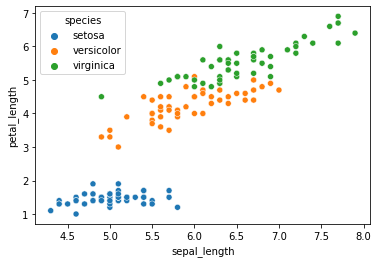

In [5]:
sns.scatterplot(irf['sepal_length'], irf['petal_length'], hue=irf['species'])
plt.show()

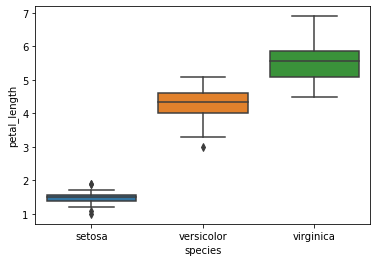

In [6]:
sns.boxplot(irf['species'], irf['petal_length'])
plt.show()

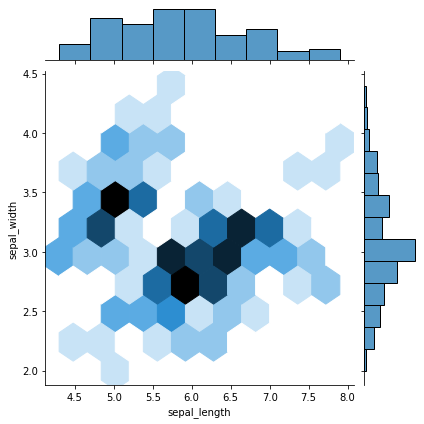

In [7]:
sns.jointplot(irf['sepal_length'], irf['sepal_width'], kind="hex")
plt.show()

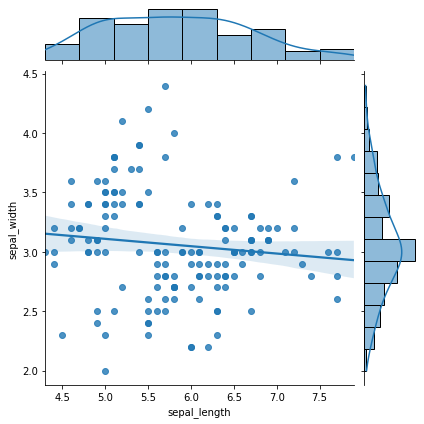

In [8]:
sns.jointplot(irf['sepal_length'], irf['sepal_width'], kind="reg")
plt.show()

In [9]:
f = sns.load_dataset('flights')
f.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [10]:
fp = f.pivot('month','year','passengers')
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

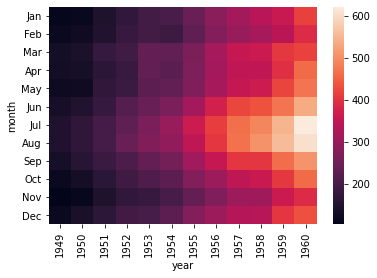

In [11]:
sns.heatmap(fp)

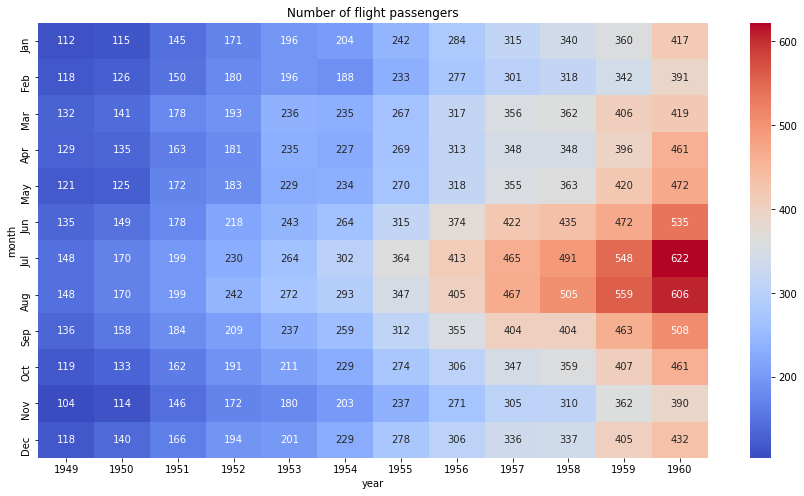

In [12]:
plt.figure(figsize=(15, 8))
sns.heatmap(fp, annot=True, cmap="coolwarm", fmt='d')
plt.title('Number of flight passengers')
plt.show()

In [13]:
import folium
m = folium.Map(location=[45.372, -121.6972], zoom_start=12, tiles='Stamen Terrain')
folium.Marker(location=[45.372, -121.6625], popup='Mt. Hood Meadows', icon=folium.Icon(icon='cloud')).add_to(m)
folium.Marker(location=[45.372, -121.7713], popup='Timr Line Lodge', icon=folium.Icon(icon='green')).add_to(m)
folium.Marker(location=[45.372, -121.6823], popup='Other Location', icon=folium.Icon(icon='info-sign')).add_to(m)
m

In [14]:
# stock exchange example
from pandas_datareader import data
bb = data.DataReader(name='AAPL', data_source='stooq', start='2019-07-01', end='2020-12-25')
bb.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-24,131.12,133.26,130.90,131.77,55012148
2020-12-23,131.96,132.23,130.58,130.76,88355528
2020-12-22,131.41,134.20,129.46,131.68,169604893
2020-12-21,124.83,128.12,123.26,128.04,121432743
2020-12-18,128.77,128.91,125.93,126.47,192829217


<AxesSubplot:xlabel='Date'>

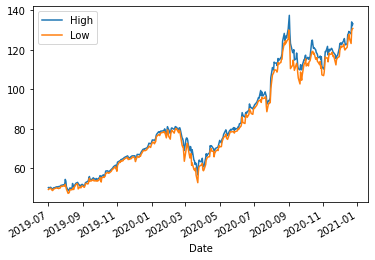

In [15]:
bb[['High', 'Low']].plot()

In [16]:
def rank_per(stock_p):
    if stock_p<50:
        return 'Poor'
    elif stock_p>50 and stock_p<120:
        return 'Satisfactory'
    else:
        return 'Steller'

In [17]:
bb['Close'].apply(rank_per).value_counts()

Satisfactory    328
Steller          34
Poor             15
Name: Close, dtype: int64

In [18]:
bb['Close'].apply(rank_per).value_counts()

Satisfactory    328
Steller          34
Poor             15
Name: Close, dtype: int64

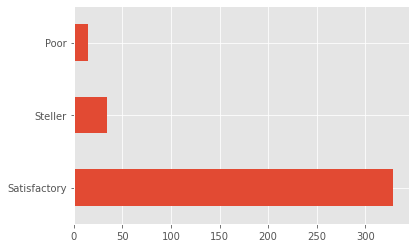

In [19]:
plt.style.use('ggplot')
bb['Close'].apply(rank_per).value_counts().plot(kind='barh')
plt.show()

In [20]:
bb['Close'].mean()

81.8070424403183